# Cohort Analysis Project – IronHack Payments

## 📌 Introduction

IronHack Payments, founded in 2020, offers innovative cash advance solutions with transparent pricing and no hidden fees. This project aims to uncover user behavior patterns using cohort analysis, helping IronHack Payments further optimize its services.

---

## 🧭 Project Overview

The goal is to analyze user cohorts defined by the month in which users made their **first cash advance request**. By tracking key metrics over time per cohort, we aim to provide actionable insights into usage behavior and financial performance.

---

## 🎯 Metrics to Analyze

We will compute and analyze the following metrics for each cohort:

1. **Frequency of Service Usage**
    Understand how often users from each cohort utilize IronHack Payments' cash advance services over time.

2. **Incident Rate**
    Determine the incident rate, specifically focusing on payment incidents, for each cohort. Identify if there are variations in incident rates among different cohorts.

3. **Revenue Generated by the Cohort**
    Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

4. **New Relevant Metric (Optional)**
   Propose and calculate a new relevant metric that provides additional insights into user behavior or the performance of IronHack Payments' services.

---

## 🛠️ Data Analysis Tools

- **Language:** Python (primary)
- **Libraries:**
  - `pandas` for data cleaning and manipulation
  - `matplotlib` / `seaborn` for visualization
---

## 🔎 Exploratory Data Analysis (EDA)

Before conducting the cohort analysis:

- Inspect dataset structure and column types
- View summary statistics using `.describe()`
- Explore distributions and detect outliers
- Examine timestamp formats and identify feature gaps

Example EDA:
- Count of cash requests per month
- Distribution of advance amounts
- Frequency of payment incidents

---

## 🧹 Data Quality Analysis

Check for and address:

- Missing values (`.isnull().sum()`)
- Duplicate records
- Inconsistent or malformed dates
- Incorrect data types (e.g., strings instead of numeric)

Document all issues found and how they were handled (e.g., dropped rows, converted types, filled values).

---

## ✅ Deliverables

- **Python Code**:
  - Data loading
  - Data cleaning and preprocessing
  - Cohort assignment and metric calculations
  - Visualization of trends and patterns

- **Visualizations**:
  - Usage frequency over time
  - Incident rate per cohort
  - Revenue heatmap
  - Custom metric visualization

- **Optional**:
  - Written summary or interpretation of findings
  - Recommendations based on results

---

## Table of Contents

1. [🛠️ Data Analysis Tools](#️-data-analysis-tools)
2. [📥 Importing Data](#-importing-data)
3. [🔎 Exploratory Data Analysis (EDA)](#-exploratory-data-analysis-eda)
4. [🧹 Data Cleaning / Quality Analysis](#-data-cleaning--quality-analysis)  
5. [🔎 Exploratory Data Analysis (EDA) – Post-Cleanup](#-exploratory-data-analysis-eda--post-cleanup)
6. [🎯 Metrics to Analyze](#-metrics-to-analyze)
    - [Frequency of Service Usage](#frequency-of-service-usage)
    - [Incident Rate](#incident-rate)
    - [Revenue Generated by the Cohort](#revenue-generated-by-the-cohort)




## 🛠️ Data Analysis Tools

In [604]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Configure libraries

In [605]:
# Set the Seaborn context to "poster" for larger text and figures
sns.set_context("poster")

# Set the default figure size for Seaborn plots
sns.set_theme(rc={"figure.figsize": (12., 6.)})

# Set the Seaborn style to "whitegrid" for a white background with gridlines
sns.set_style("whitegrid")

## 📥 Importing Data

In [606]:
#First we removed the spaces from the csv files so we can easily import them here

# lists of columns containing dates -> for parsing
datetime_columns_cash_request = [
    "created_at",
    "updated_at",
    "moderated_at",
    "cash_request_received_date",
    "reimbursement_date",
    "money_back_date",
    "send_at",
    "reco_last_update",
    "reco_creation"
]
   
datetime_columns_fees = [
    "created_at",
    "updated_at",
    "paid_at",
    "from_date",
    "to_date"
]

# We modified our import process to directly cast proper datatypes for dates.
# Float/integer will still be handled in data cleaning, 
# since some of the offending columns have NaN values causing issues (hence presumably the wrong automatic casting)
fees = pd.read_csv("../project_dataset/extract-fees-dataanalyst.csv",
                            parse_dates = datetime_columns_fees)
cashRequest = pd.read_csv("../project_dataset/extract-cashrequest-dataanalyst.csv", 
                            parse_dates = datetime_columns_cash_request)



## 🔎 Exploratory Data Analysis (EDA)

In [607]:
# This is how we get a small insight in the data
display(fees.head())
# Overview of data in fees
fees.info()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  object             
 10  from_date        7766 non-null   object             
 11  to_date          7766 non-null   object             
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

**Observations**:

- `cash_request_id` is automatically cast as float64. `int` might be more plausible, change in cleaning
- date-related columns (`created_at`,`updated__at`,`paid_at`,`from_date`,`to_date`) will need special treatment 
- after date casting at import still trouble for `paid_at`,`from_date`,`to_date`

In [608]:
display(cashRequest.head())
# Overview of data in cashRequest
cashRequest.info()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00:00,2019-12-11 16:47:42.407830+00:00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaT,NaN,regular,NaN,NaN,NaT,NaT
1,70,100.0,rejected,2019-12-10 19:50:12.347780+00:00,2019-12-11 14:24:22.900054+00:00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaT,NaN,regular,NaN,NaN,NaT,NaT
2,7,100.0,rejected,2019-12-10 19:13:35.825460+00:00,2019-12-11 09:46:59.779773+00:00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaT,NaN,regular,NaN,NaN,NaT,NaT
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00:00,2019-12-18 14:26:18.136163+00:00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaT,NaN,regular,NaN,NaN,NaT,NaT
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00:00,2020-05-07 09:21:55.340080+00:00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaT,NaN,regular,NaN,NaN,NaT,NaT


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  object             
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  object             
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             16543 non-null  object        

**Observations**:

- `delete_account_id` and `user_id` needn't be floats (cast to int later)
- date-related columns (`created_at`,`updated__at`,`moderated_at`...) will need special treatment
- fewer unique `user_id` values than cashRequest `id`s: indicating multiple transactions for some users or actual missing values?
- after date casting at import the following fields are still `object` rather than `datetime`:
  `moderated_at`,`reimbursement_date`,`money_back_date`,`send_at`


## Function for evaluations

In [609]:
# One function to show all details about the dataframe
def evaluateDataFrame(df):
    # Lets check how many values we actually have
    print("Total amount of records")
    print(len(df))
    print()
    # This shows us the amount of empty rows for each column 
    print("Empty rows")
    print(df.isna().sum())
    print()
    # check the number of unique values for each column 
    print("Unique rows")
    print(df.nunique())
    print()
    print("DataFrame info")         
    fees.info()
    print()

### Use evaluateDataFrame to evaluate our data

In [610]:

# commented for now, piecewise presentation might be more readable in notebook 

evaluateDataFrame(cashRequest)
evaluateDataFrame(fees)


Total amount of records
23970

Empty rows
id                                0
amount                            0
status                            0
created_at                        0
updated_at                        0
user_id                        2103
moderated_at                   7935
deleted_account_id            21866
reimbursement_date                0
cash_request_received_date     7681
money_back_date                7427
transfer_type                     0
send_at                        7329
recovery_status               20640
reco_creation                 20640
reco_last_update              20640
dtype: int64

Unique rows
id                            23970
amount                           41
status                            7
created_at                    23970
updated_at                    23970
user_id                       10798
moderated_at                  16035
deleted_account_id             1141
reimbursement_date             4089
cash_request_received_date      

### Use inspect_data_types to get to know the different datatypes
Only two types of fees are levied: 5 and 10 Euros(?) - maybe convert to int as well?

In [611]:
def inspect_data_types(df, name="DataFrame"):
    print(f"=== {name} ===")
    numerical = df.select_dtypes(include='number').columns.tolist()
    categorical = df.select_dtypes(include='object').columns.tolist()
    datetime = df.select_dtypes(include=['datetime','datetime64','datetime64[ns, UTC]']).columns.tolist()
      
    print(f"Numerical columns ({len(numerical)}): {numerical}")
    print(f"Categorical columns ({len(categorical)}): {categorical}")
    print(f"Date columns ({len(datetime)}): {datetime}")
    print()
    
    return numerical, categorical, datetime       


In [612]:

cashr_numcols, cashr_strcols, cashr_dtcols = inspect_data_types(cashRequest, name="cashRequest")


=== cashRequest ===
Numerical columns (4): ['id', 'amount', 'user_id', 'deleted_account_id']
Categorical columns (7): ['status', 'moderated_at', 'reimbursement_date', 'money_back_date', 'transfer_type', 'send_at', 'recovery_status']
Date columns (5): ['created_at', 'updated_at', 'cash_request_received_date', 'reco_creation', 'reco_last_update']



In [613]:
fees_numcols, fees_strcols, fees_dtcols = inspect_data_types(fees, name="fees")


=== fees ===
Numerical columns (3): ['id', 'cash_request_id', 'total_amount']
Categorical columns (8): ['type', 'status', 'category', 'reason', 'paid_at', 'from_date', 'to_date', 'charge_moment']
Date columns (2): ['created_at', 'updated_at']



Several of the date fields aren't typed correctly, fix in data cleaning and rerun function

**Observations**

- 2103 empty values in `cashRequest.user_id` corresponding to the difference to `id` noted above
  - also: very close to value of `deleted_account` id (2104), so possible relation to that
- fees are associated to cashRequests via `cash_request_id`

We used these insights to adapt our data import in order to directly cast the correct datatypes for columns that were not correctly identified automatically.  

## 🧹 Data Cleaning / Quality Analysis

### Instructions
1. Parse all values to the right data types
2. remove loose items (like fees without cashRequest)
3. Fill the user_id columns with deleted_account_id were empty because of account deletion

In [614]:
# clean the start and ends of all column names so we get no suprises in the data retrieval later
fees.columns = fees.columns.str.strip()
cashRequest.columns = cashRequest.columns.str.strip()

In [615]:
cashRequest['user_id'] = cashRequest['user_id'].fillna(cashRequest['deleted_account_id'])

print(cashRequest['user_id'].isnull().sum())

0


The next block is going to fix datatypes for both dataframes, i.e. fixing the missing dates and casting some columns as integers.

In [616]:

# This is antoher option of parsing datatypes
# errors="coerce" -> means that erroes will force conversion and replace any invalid or unconvertible values with NaT



datetime_columns_cash_request = [
    "created_at",
    "updated_at",
    "moderated_at",
    "cash_request_received_date",
    "reimbursement_date",
    "money_back_date",
    "send_at",
    "reco_last_update",
    "reco_creation"
]

for col in datetime_columns_cash_request:
    cashRequest[col] = pd.to_datetime(cashRequest[col], errors="coerce")
    
# the cash_request_received_date doesnt have an timezone so we normalize it to the standard utc
cashRequest["cash_request_received_date"] = cashRequest["cash_request_received_date"].dt.tz_localize("UTC")
datetime_columns_fees = [
    "created_at",
    "updated_at",
    "paid_at",
    "from_date",
    "to_date"
]

for col in datetime_columns_fees:
    fees[col] = pd.to_datetime(fees[col], errors="coerce")
    


float_to_int_fees = [
    "cash_request_id",
    "id"
]

# This currently doesn't work with astype(int), while astype("Int64")
for col in float_to_int_fees:
    fees[col] = pd.to_numeric(fees[col], errors="coerce").astype("Int64")
     
float_to_int_cash_request = [
    "user_id",
    "deleted_account_id",
    "id"
]

for col in float_to_int_cash_request:
    cashRequest[col] = pd.to_numeric(cashRequest[col], errors="coerce").astype("Int64")
    

In [617]:

cashr_numcols, cashr_strcols, cashr_dtcols = inspect_data_types(cashRequest, name="cashRequest")

=== cashRequest ===
Numerical columns (4): ['id', 'amount', 'user_id', 'deleted_account_id']
Categorical columns (3): ['status', 'transfer_type', 'recovery_status']
Date columns (9): ['created_at', 'updated_at', 'moderated_at', 'reimbursement_date', 'cash_request_received_date', 'money_back_date', 'send_at', 'reco_creation', 'reco_last_update']



In [618]:
fees_numcols, fees_strcols, fees_dtcols = inspect_data_types(fees, name="fees")


=== fees ===
Numerical columns (3): ['id', 'cash_request_id', 'total_amount']
Categorical columns (5): ['type', 'status', 'category', 'reason', 'charge_moment']
Date columns (5): ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']



NA-values in `fees.cash_request_id` are for cancelled transactions - let's drop them!(?)

In [619]:
# creating copies before dropping values (optional)
fees_cp = fees.copy()
cashRequest_cp = cashRequest.copy()

In [620]:
# Drop all rows that have are not connected to a cash request anymore
fees_cp.dropna(subset=['cash_request_id'],inplace=True)

### Checking NaT dates

In [621]:
# check date fields with missing data to assess significance
for col in cashr_dtcols:
    if cashRequest_cp[col].isna().sum() > 0:
        print(col, ': ', cashRequest_cp[col].isna().sum())       

moderated_at :  8058
reimbursement_date :  20920
cash_request_received_date :  7681
money_back_date :  11930
send_at :  7504
reco_creation :  20640
reco_last_update :  20640


### Creating column for cohorts

In [622]:
# create a new column with the created_at converted to the month annotation like 2024-03-18, 2023-11-02 etc -> these can be used to be labels for the plot

#add cohort month-assigns each row to a monthly cohort based on when the request was created (above) 
    #basically this just adds another column in the excel sheet called "cohort"
cashRequest_cp['created_month'] = cashRequest_cp['created_at'].dt.to_period('M')

cashRequest_cp['cohort'] = (
    cashRequest_cp
    .groupby('user_id')['created_month']
    .transform('min')  # the user's first month
)

C:\Users\jd.vandebijl\AppData\Local\Temp\ipykernel_26080\1742942615.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cashRequest_cp['created_month'] = cashRequest_cp['created_at'].dt.to_period('M')



## 🔎 Exploratory Data Analysis (EDA) – Post-Cleanup

### Numerical data

#### Cash Requests

In [623]:
cashRequest_cp.describe()

,id,amount,user_id,deleted_account_id
count,23970.0,23970.000000,23970.0,2104.0
mean,13910.966124,82.720818,30570.545265,9658.755228
std,7788.117214,26.528065,27266.706244,7972.743249
min,3.0,1.000000,34.0,91.0
25%,7427.25,50.000000,9269.0,3767.0
50%,14270.5,100.000000,21465.0,6121.5
75%,20607.75,100.000000,43198.5,16345.0
max,27010.0,200.000000,103719.0,30445.0


`amount` is the only numerical variable where the statistics are meaningfully interpretable, since the others are just IDs.
Cash request amounts ranged between 1€ and 200€ with the median at 100€ and a mean of just under 83€.

The histogram below illustrates this insight, with the majority of datapoints at 100€ and most of the remainder beneath that value.

The further split-up by status also shows that almost all of the small amount requests (around 25€) have been successfully reimbursed. For amounts of 50 and 100, there is a noticable proportion of cancelled requests (probably just over half for 50€ and about 1/3 for the 100€ requests).

In [624]:
fees_cp.describe()

,id,cash_request_id,total_amount
count,21057.0,21057.0,21057.000000
mean,10646.670228,16318.449162,5.000237
std,6099.136169,6656.149949,0.034457
min,1.0,1456.0,5.000000
25%,5388.0,11745.0,5.000000
50%,10654.0,17160.0,5.000000
75%,15926.0,21796.0,5.000000
max,21193.0,27010.0,10.000000


Fees ranged between 5 and 10€ with most of them at 5€ (given that the mean is almost at 5€).

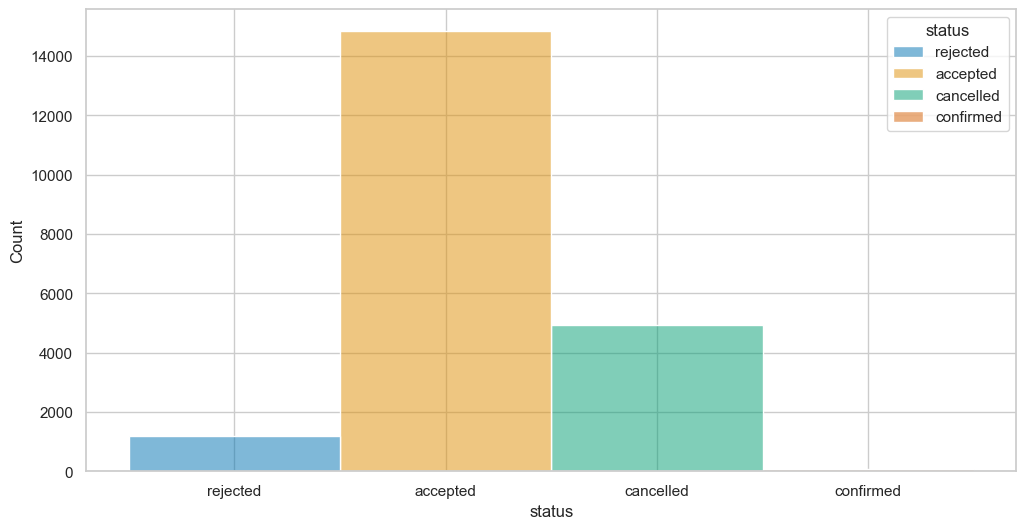

In [625]:
sns.histplot(fees_cp,x='status',palette='colorblind', hue='status');


Most of the fees were successfully charged. A smaller number of fee bookings were cancelled (following the documentation mostly due to failed postpone fees, so there might be an expected correlation with `type` postpone). An even smaller number of fees had the `status` rejected, i.e. their charge had failed.

In [626]:
pd.crosstab(fees_cp.type,fees_cp.status)

status,accepted,cancelled,confirmed,rejected
type,,,,
incident,1560,97,19,520
instant_payment,10296,57,69,673
postpone,2985,4780,0,1


Indeed, the overwhelming majority of rows with `status` cancelled are of `type` postpone. This is also reflected in the barplot below.

<Axes: xlabel='type', ylabel='total_amount'>

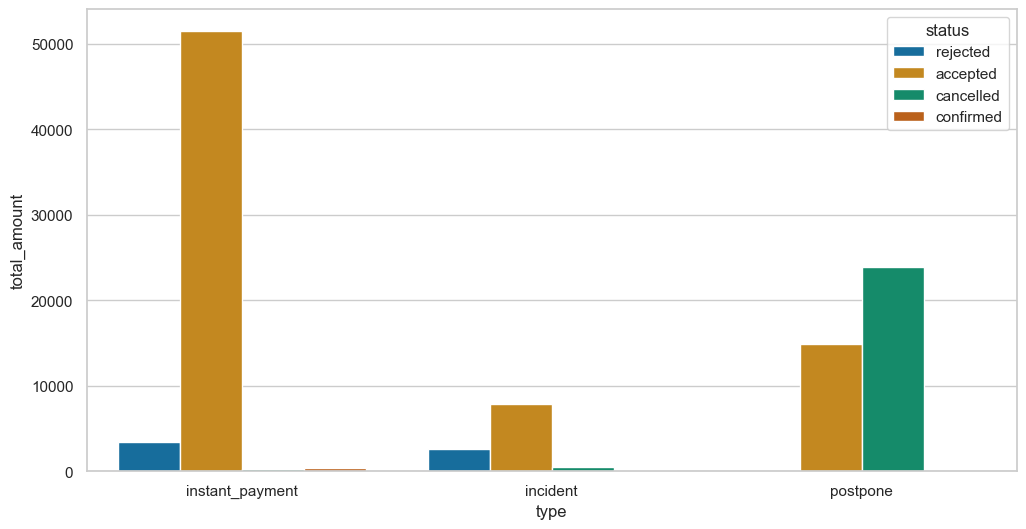

In [627]:
# total fees by type of fee
sns.barplot(fees_cp,x='type',y='total_amount',hue='status',palette='colorblind',estimator=sum)

The major amount of fees comes from `instant_payment`s, a smaller amount from `postponement`s (of which more than half are actually cancelled) and the smallest amount comes from `incident`s

## Categorical data

In [628]:
cr_status_counts = cashRequest_cp.status.value_counts()
cr_status_counts

status
money_back               16397
rejected                  6568
direct_debit_rejected      831
active                      59
transaction_declined        48
direct_debit_sent           34
canceled                    33
Name: count, dtype: int64

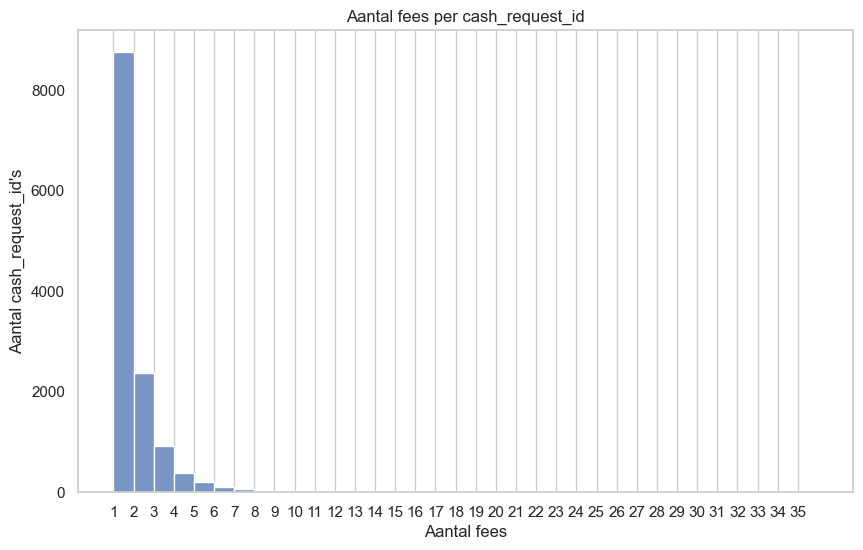

In [629]:
# Group fees per Cash request and count the amount of fees for the cash request
fee_counts = fees_cp.groupby("cash_request_id").size().reset_index(name="fee_count")

# Visualizing
plt.figure(figsize=(10, 6))
sns.histplot(fee_counts["fee_count"], bins=range(1, fee_counts["fee_count"].max() + 2), kde=False)
plt.title("Aantal fees per cash_request_id")
plt.xlabel("Aantal fees")
plt.ylabel("Aantal cash_request_id's")
plt.xticks(range(1, fee_counts["fee_count"].max() + 1))
plt.grid(axis="y")
plt.show()

<Axes: xlabel='amount', ylabel='Count'>

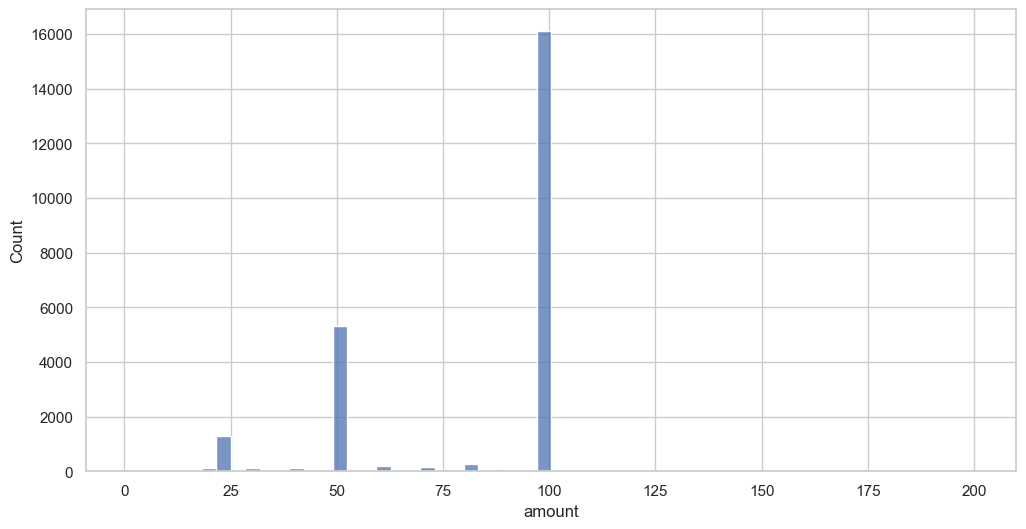

In [630]:
# histogram of amounts for cashrequests (not using the merged dataset here to avoid issues )
sns.histplot(cashRequest_cp,x="amount")

Most common cash advance requests were for 100€, followed by 50€ and some 25€ requests.

<Axes: xlabel='amount', ylabel='status'>

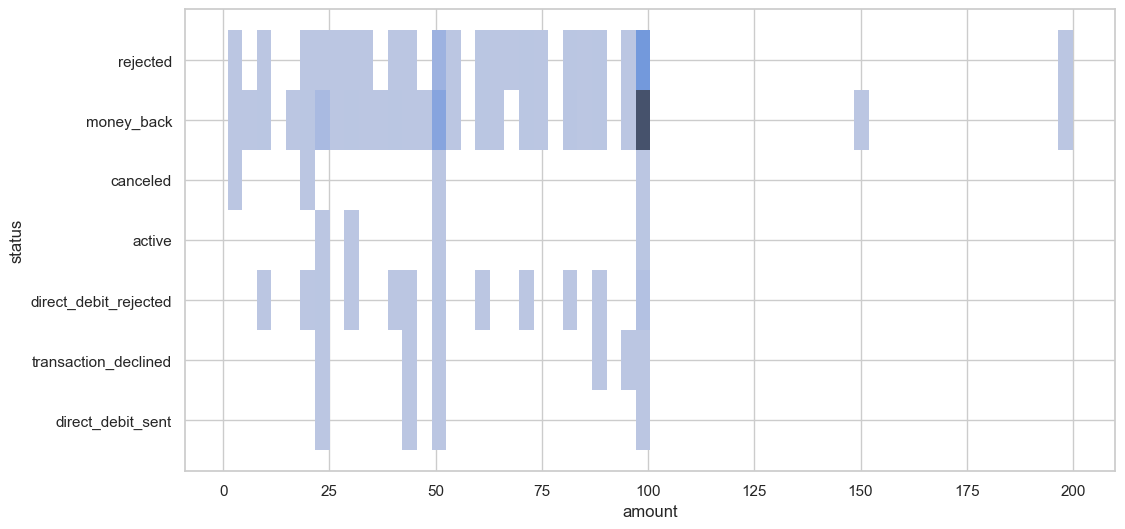

In [631]:
# plotting histogram of amount
sns.histplot(cashRequest_cp,x="amount",y="status")


## 🎯 Metrics to Analyze


### Frequency of Service Usage

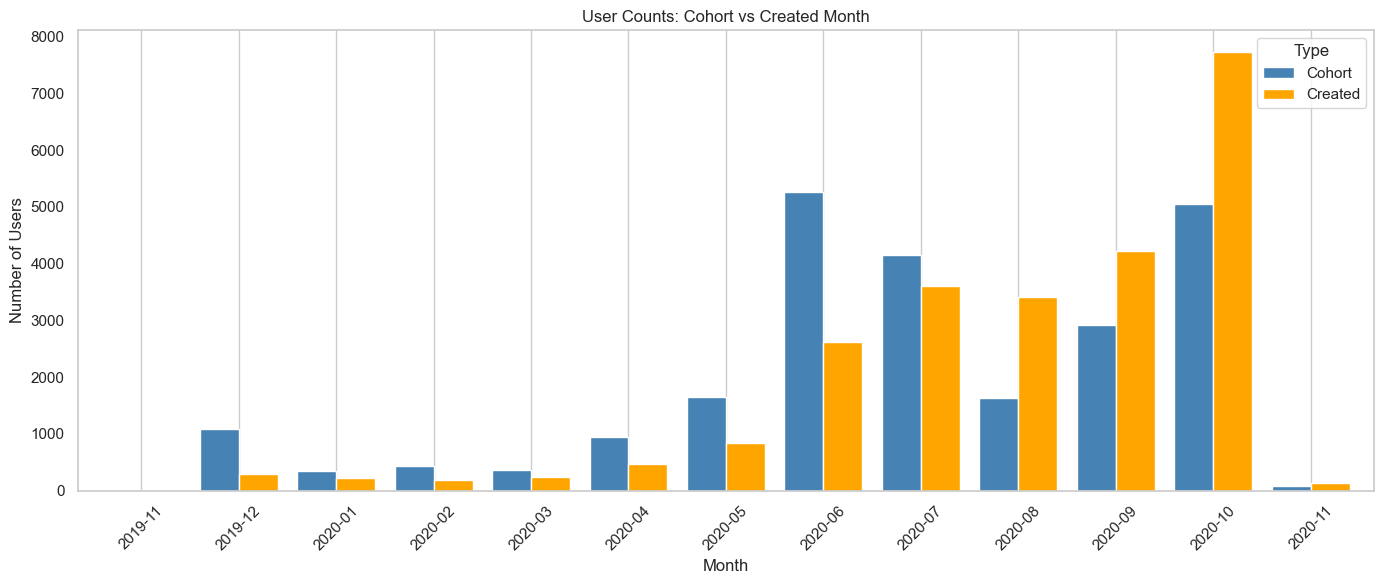

In [632]:

# Group data
cohort_counts = cashRequest_cp.groupby('cohort')['user_id'].count()

# display(cohort_counts)
created_counts = cashRequest_cp.groupby('created_month')['user_id'].count()
# Convert Period to string if needed
cohort_counts.index = cohort_counts.index.astype(str)
created_counts.index = created_counts.index.astype(str)

# Align indexes
combined = pd.DataFrame({
    'Cohort': cohort_counts,
    'Created': created_counts
}).fillna(0)  # in case some months are missing in one of the series

# Plot as grouped bar chart
ax = combined.plot(
    kind='bar',
    figsize=(14, 6),
    width=0.8,  # controls total bar width
    color=['steelblue', 'orange'],
    title='User Counts: Cohort vs Created Month'
)

plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [633]:
# get counts for users per cohort (courtesy of Jan above)
cohort_counts = cashRequest_cp.groupby('cohort')['user_id'].nunique().reset_index()
cohort_counts.rename(columns={'user_id':'user_count'},inplace=True)
cohort_counts['cohort'] = cohort_counts['cohort'].astype(str)
cohort_counts.dtypes

cohort        object
user_count     int64
dtype: object

In [634]:
# create groupby for cohort and month created
cashReq_grouped = cashRequest_cp.groupby(['cohort', 'created_month'])['id'].count().reset_index()
cashReq_grouped['cohort'] = cashReq_grouped['cohort'].astype(str)

# renaming
cashReq_grouped.rename(columns={'id': 'request_count'}, inplace=True)

# merging with cohort_counts to get user numbers per cohort
cashReq_grouped= cashReq_grouped.merge(cohort_counts,on='cohort',how='left')
# calculate interactions per user
cashReq_grouped['interactions_per_user'] = round(cashReq_grouped['request_count'] / cashReq_grouped['user_count'],3)

# retyping and reformatting
cashReq_grouped['created_month_dt'] = cashReq_grouped['created_month'].dt.to_timestamp()
cashReq_grouped['created_month_str'] = cashReq_grouped['created_month_dt'].dt.strftime('%Y-%m')

# sorting
cashReq_grouped.sort_values('created_month_dt', inplace=True)

cashReq_grouped.dtypes

cohort                           object
created_month                 period[M]
request_count                     Int64
user_count                        int64
interactions_per_user           Float64
created_month_dt         datetime64[ns]
created_month_str                object
dtype: object

Lineplot and barplot are suboptimal, especially due to the large numbers-

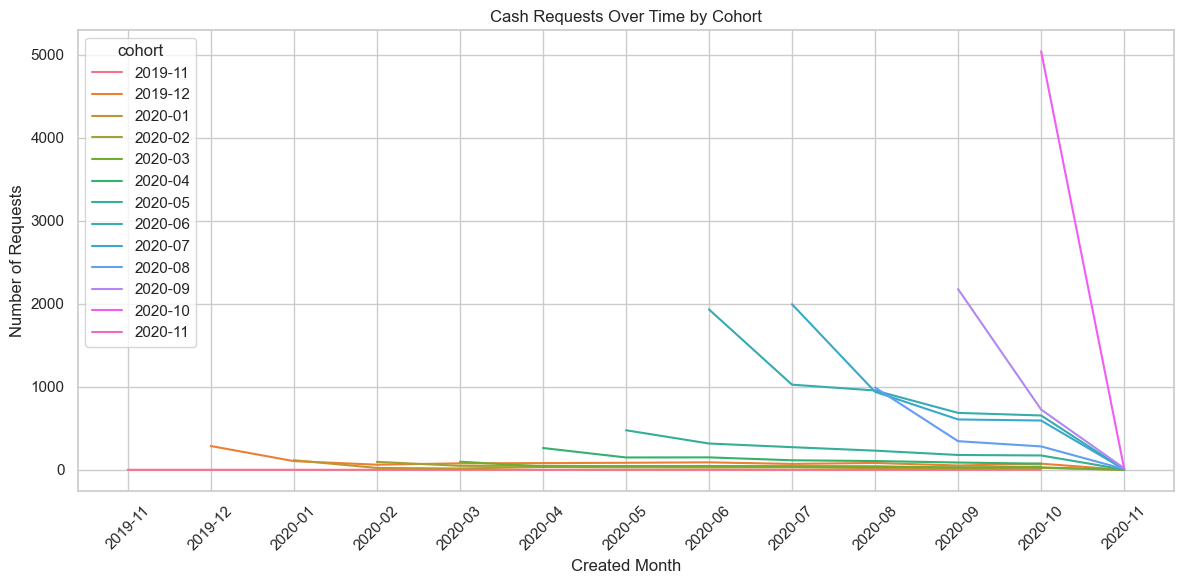

In [635]:

## Create the lineplot
sns.lineplot(
    data=cashReq_grouped,
    x='created_month_str',
    y='request_count',
    hue='cohort'
)

# layout
plt.title('Cash Requests Over Time by Cohort')
plt.xlabel('Created Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


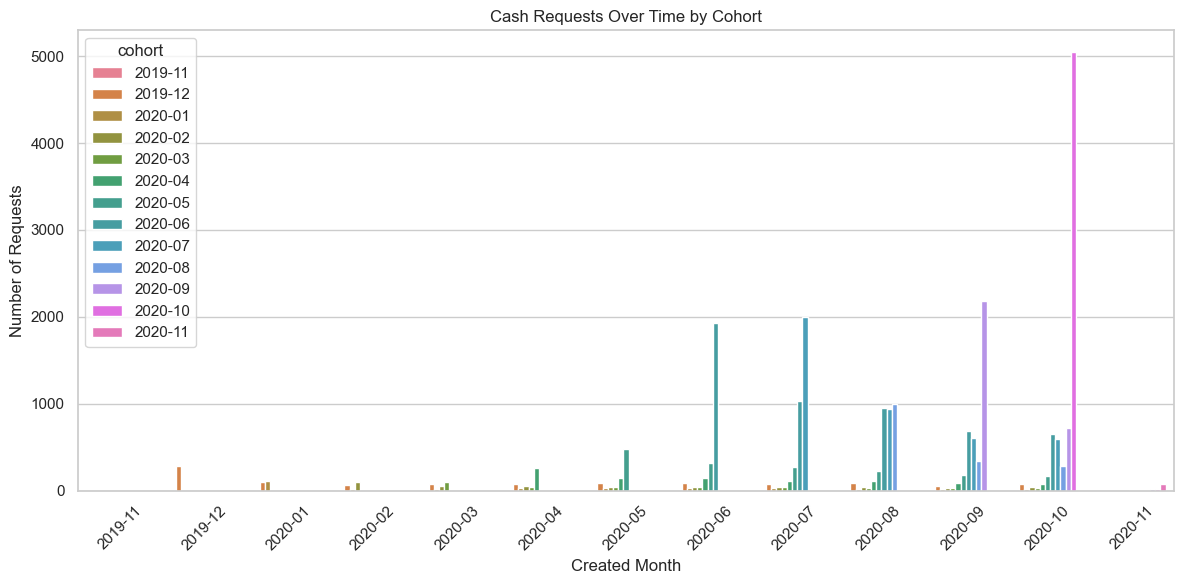

In [636]:

## Create the lineplot
sns.barplot(
    data=cashReq_grouped,
    x='created_month_str',
    y='request_count',
    hue='cohort'
)

# layout
plt.title('Cash Requests Over Time by Cohort')
plt.xlabel('Created Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

A heatmap representation allows representation of interaction counts per month for each cohort:

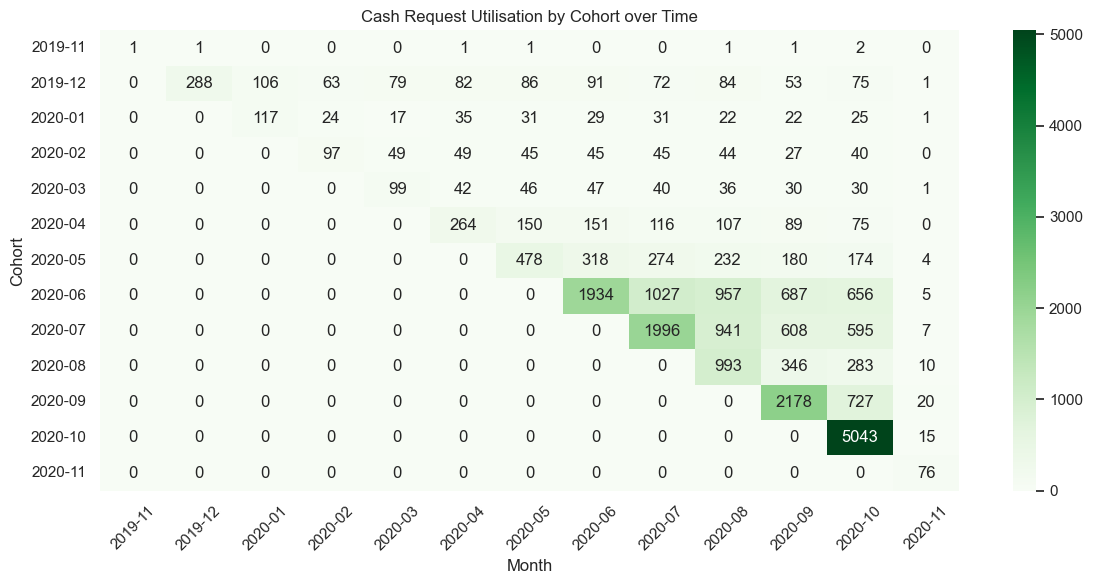

In [637]:
pivot = cashReq_grouped.pivot(index='cohort', columns='created_month_str', values='request_count')
pivot = pivot.astype(float).fillna(0)  # Replace NaNs with 0

sns.heatmap(pivot, cmap='Greens', annot=True, fmt='g')
plt.title('Cash Request Utilisation by Cohort over Time')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Alternatively, we can relativise the interaction counts to the cohort size to account for different total numbers. The diagonal values are at least 1 because the number of cohort members gets instated by their first interaction with the system. The very small first column automatically gets very "strong" values even though a cohort of 1 member may not be that informative.

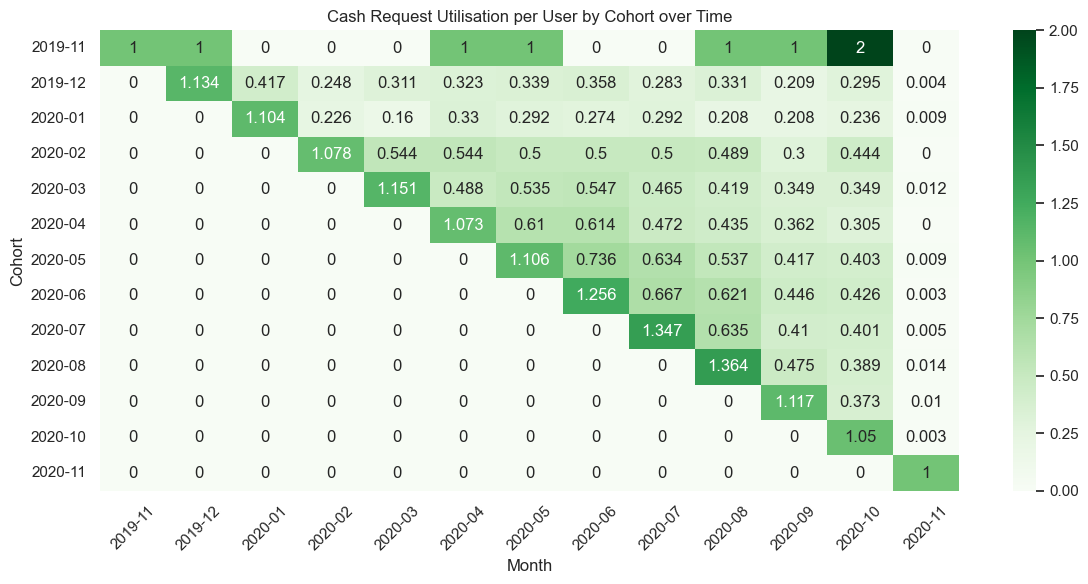

In [638]:
pivot = cashReq_grouped.pivot(index='cohort', columns='created_month_str', values='interactions_per_user')
pivot = pivot.astype(float).fillna(0)  # Replace NaNs with 0

sns.heatmap(pivot, cmap='Greens', annot=True, fmt='g')
plt.title('Cash Request Utilisation per User by Cohort over Time')
plt.xlabel('Month')
plt.ylabel('Cohort')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='created_month_str', ylabel='request_count'>

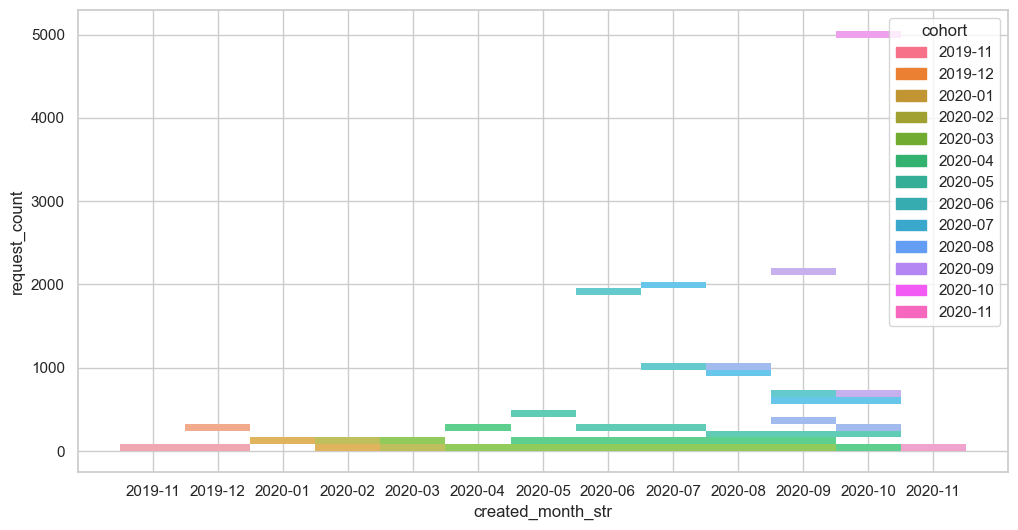

In [639]:
# alternative attempt, can maybe be ignored
sns.histplot(cashReq_grouped,x='created_month_str',y='request_count',hue='cohort')

### Incident Rate


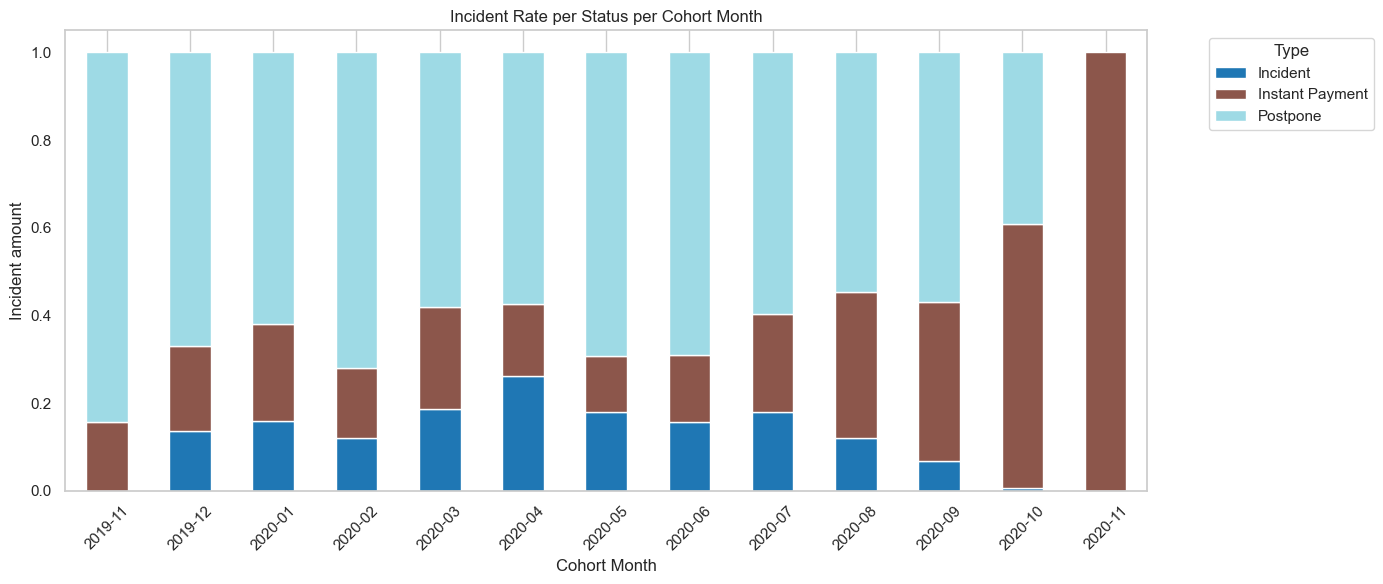

In [ ]:
# get a collection of all fees and left join the cashRequest data on it
cashRequestFees = fees.merge(cashRequest_cp, how='left', left_on='cash_request_id', right_on='id')

# Count number of items per (cohort, type)

incident_count = cashRequestFees.groupby(['cohort', 'type']).size().unstack(fill_value=0)
# print("incident count:")
# display(incident_count)
# print()

# Get total rows per cohort
cohort_totals = incident_count.sum(axis=1)
# print("Cohort totals:")
# display(cohort_totals)
# print()

# Calculate incident rate per status (per cohort)
incident_rate = incident_count.divide(cohort_totals, axis=0)
# print("incident_rate:")
# print(incident_rate.head())
# print()

# Clean up column names: remove underscores and make it a title
incident_rate.columns = [col.replace('_', ' ').title() for col in incident_rate.columns]
# print("columns:")
# print(incident_rate.columns)
# print()

# Plot as stacked bar chart
incident_rate.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 6),
    colormap='tab20',
    title='Incident Rate per Status per Cohort Month'
)

plt.xlabel('Cohort Month')
plt.ylabel('Incident amount')
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Revenue Generated by the Cohort

In [641]:
##3. **Revenue Generated by the Cohort:** Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.
# Merge revenue info from fees: 
    #1. make smaller version of the fees DF that has: which cash_request_id was charged, how much was charged (total_amount)
    #2.renames cash_request_id to match the id column in cashRequest
    #3.Merges them w my copy of cashRequest  (if the ids match) to add a new column (total_amount from fees) to the cashrequest copy. Merged left so we keep all the cash requests even if they are NaN for fees.  
fees_cp = fees[["cash_request_id", "total_amount"]].copy()
fees_cp = fees_cp.rename(columns={"cash_request_id": "id"})
cashRequest_cp = cashRequest_cp.merge(fees_cp, on="id", how="left")

# Add request month column to cashrequstcp: tracks when each cash request was made (monthly) and allows for 2D table;
    #request_month is specific to each cash request so its specific to each transaction! It can repeat if users make multipe requests each month and it can very for the same user in different months. 
        #we need this to analyze the total revenue generated by each cohort OVER MONTHS. WIthout it we only know the revenue from each cohort!
    #cohort is specific to each user and doesnt change across rows for the same user. We need this to group users into cohorts.
    #2D table: #rows (when joined-cohort, columns-when request was made, values-revenue in that month)
    #allows you to analyze how revenue changes over time for each group of created_at (the cohort)
cashRequest_cp["request_month"] = cashRequest_cp["created_at"].dt.to_period("M")
##3. **Revenue Generated by the Cohort:** Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

#tells you how many requests (txns) were made each month
cashRequest_cp["request_month"].value_counts().sort_index()


C:\Users\jd.vandebijl\AppData\Local\Temp\ipykernel_26080\2726039352.py:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cashRequest_cp["request_month"] = cashRequest_cp["created_at"].dt.to_period("M")


request_month
2019-11       1
2019-12     289
2020-01     223
2020-02     184
2020-03     244
2020-04     473
2020-05     997
2020-06    3662
2020-07    4793
2020-08    5250
2020-09    6227
2020-10    9611
2020-11     140
Freq: M, Name: count, dtype: int64

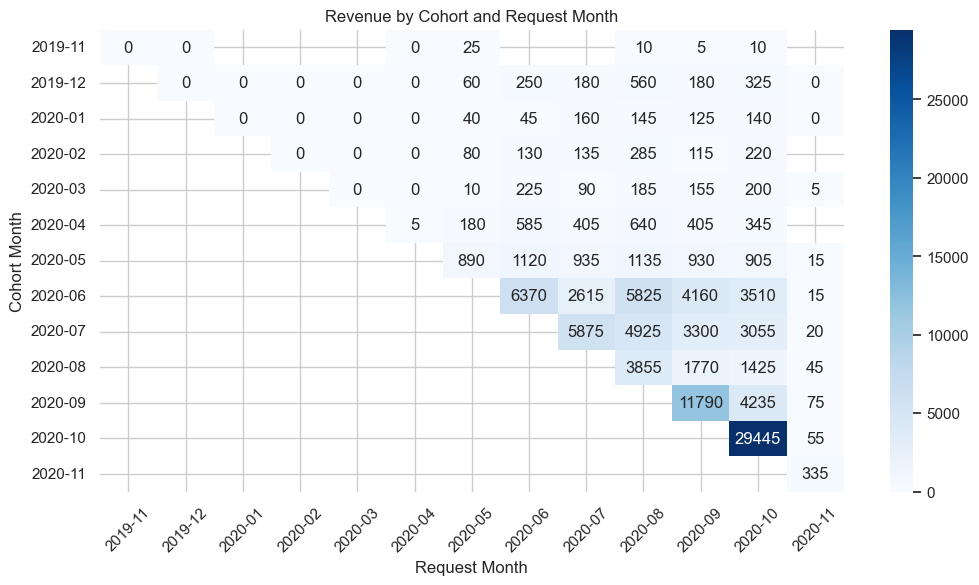

In [642]:
##3. **Revenue Generated by the Cohort:** Calculate the total revenue generated by each cohort over months to assess the financial impact of user behavior.

#VISUALIZATION
# Group and calculate total revenue (total_amount) per cohort per request month
    #groups data by: cohort (when joined)
    #request_month (when revenue happened)

revenue_by_cohort = (
    cashRequest_cp
    .groupby(["cohort", "request_month"])["total_amount"]
    .sum()
    .reset_index()
)
# Optional: pivot the data to see it as a heatmap...doesnt do anything in this context of code.
    #turns the grouped table into a matrix (rows=cohort, columns=months, values=revenue)
revenue_pivot = revenue_by_cohort.pivot(index="cohort", columns="request_month", values="total_amount")

# Plot the heatmap
    #blue=revenue...lets you see what cohorts bring the most $ over time. 
plt.figure(figsize=(12, 6))
sns.heatmap(revenue_pivot, cmap="Blues", annot=True, fmt=".0f")
plt.title("Revenue by Cohort and Request Month")
plt.ylabel("Cohort Month")
plt.xlabel("Request Month")
plt.xticks(rotation=45)
plt.show()




### New Relevant Metric

<PeriodArray>
['2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
 '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11']
Length: 13, dtype: period[M]
<PeriodArray>
['2019-11', '2019-12', '2020-04', '2020-05', '2020-08', '2020-09', '2020-10',
 '2020-01', '2020-02', '2020-03', '2020-06', '2020-07', '2020-11']
Length: 13, dtype: period[M]
[ 0  1  5  6  9 10 11  2  3  4  7  8]
retention_matrix: 13
retention_rate: 13
Mean retention per period:
 period_index
0     1.000000
1     0.440429
2     0.345588
3     0.340334
4     0.301021
5     0.380918
6     0.363713
7     0.255532
8     0.210466
9     0.465235
10    0.417843
11    0.501969
dtype: float64

Overall mean retention rate: nan%


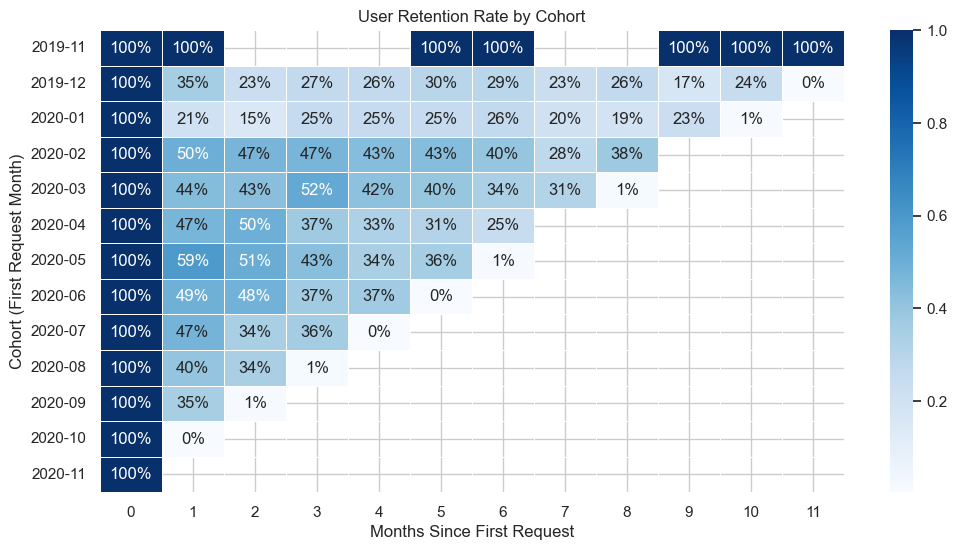

In [ ]:

# STEP 1: Assign cohort per user (first created month)
user_cohort = cashRequest_cp.groupby("user_id")["created_month"].min().rename("cohort")
df = cashRequest_cp.merge(user_cohort, on="user_id", suffixes=("", "_user_cohort"))

# STEP 2: Drop duplicate user_id per request_month to capture presence
monthly_activity = df[["user_id", "cohort_user_cohort", "request_month"]].drop_duplicates()

# STEP 3: Count users per cohort per request month
cohort_counts = (
    monthly_activity
    .groupby(["cohort_user_cohort", "request_month"])
    .agg(n_users=("user_id", "nunique"))
    .reset_index()
)
print(cohort_counts['cohort_user_cohort'].unique())
print(cohort_counts['request_month'].unique())
# STEP 4: Calculate the period index (months since cohort started)
cohort_counts["period_index"] = (
    cohort_counts["request_month"].astype("int") -
    cohort_counts["cohort_user_cohort"].astype("int")
)
# .apply(lambda x: x.days // 30)
print(cohort_counts['period_index'].unique())
# STEP 5: Create retention matrix (cohort x months-since-start)
retention_matrix = cohort_counts.pivot_table(
    index="cohort_user_cohort",
    columns="period_index",
    values="n_users"
)
print(f"retention_matrix: {len(retention_matrix)}")
print(f"retention_matrix: {len(retention_matrix)}")
# STEP 6: Normalize to get retention rates
retention_rate = retention_matrix.divide(retention_matrix[0], axis=0)
print(f"retention_rate: {len(retention_rate)}")
# STEP 7: Mean retention rate per period (across cohorts)
mean_retention_per_period = retention_rate.mean()
print("Mean retention per period:\n", mean_retention_per_period)

# STEP 8: Overall mean retention rate (single number)
overall_mean_retention = retention_rate.values.mean()
print(f"\nOverall mean retention rate: {overall_mean_retention:.2%}")

plt.figure(figsize=(12, 6))
sns.heatmap(retention_rate, cmap="Blues", annot=True, fmt=".0%", linewidths=0.5)
plt.title("User Retention Rate by Cohort")
plt.xlabel("Months Since First Request")
plt.ylabel("Cohort (First Request Month)")
plt.show()